# Data scraping, data wrangling, data analytics, exploratory data analysis, advaced plotting and clustering with love.

In this tutorial we mainly address advanced data analytics and plotting. 

We are going to use **pandas** [1] to do data manipulation and data analytics of the `DataFrame`.  

Finally, we are going to do advanced plotting using **matplotlib** [2] and **seaborn** [3].

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
#import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

To load the csv file and use column 0 as the row labels of the `DataFrame`, we proceed as follows, 


In [3]:
#shot_df = pd.read_csv('test.csv')
#shot_df = pd.read_csv(filepath_or_buffer='test.csv')
shot_df = pd.read_csv(filepath_or_buffer='test.csv',index_col=0)


To display the information in `shot_df` (we only display the first 10 rows), and force **pandas** to display all the columns, you can proceed as follows,


In [4]:
pd.set_option('display.max_columns', None)
shot_df.head(10)


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
0,Shot Chart Detail,21400018,4,2544,LeBron James,1610612739,Cleveland Cavaliers,1,11,20,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,18,114,148,1,0
1,Shot Chart Detail,21400018,33,2544,LeBron James,1610612739,Cleveland Cavaliers,1,6,30,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,0,1,1
2,Shot Chart Detail,21400018,53,2544,LeBron James,1610612739,Cleveland Cavaliers,1,4,45,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,12,-105,63,1,0
3,Shot Chart Detail,21400018,77,2544,LeBron James,1610612739,Cleveland Cavaliers,1,2,31,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,227,-16,1,0
4,Shot Chart Detail,21400018,82,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,51,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,91,246,1,0
5,Shot Chart Detail,21400018,136,2544,LeBron James,1610612739,Cleveland Cavaliers,2,9,18,Missed Shot,Jump Bank Shot,2PT Field Goal,In The Paint (Non-RA),Right Side(R),8-16 ft.,9,70,58,1,0
6,Shot Chart Detail,21400018,202,2544,LeBron James,1610612739,Cleveland Cavaliers,2,3,16,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,122,235,1,0
7,Shot Chart Detail,21400018,217,2544,LeBron James,1610612739,Cleveland Cavaliers,2,1,55,Missed Shot,Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-8,0,1,0
8,Shot Chart Detail,21400018,227,2544,LeBron James,1610612739,Cleveland Cavaliers,2,1,16,Missed Shot,Turnaround Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,135,22,1,0
9,Shot Chart Detail,21400018,299,2544,LeBron James,1610612739,Cleveland Cavaliers,3,6,54,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,26,249,1,1


We can create a new `DataFrame` using the `DataFrame shot_df` with some given columns, as follows,

In [5]:
shot_df1 = pd.DataFrame(shot_df, columns = ['PERIOD','SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_MADE_FLAG', 'LOC_X', 'LOC_Y'])


To display the information in `shot_df1` (we only display the first 5 rows),

In [6]:
shot_df1.head()


,PERIOD,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_MADE_FLAG,LOC_X,LOC_Y
0,1,2PT Field Goal,Mid-Range,0,114,148
1,1,2PT Field Goal,Restricted Area,1,-7,0
2,1,2PT Field Goal,Mid-Range,0,-105,63
3,1,3PT Field Goal,Right Corner 3,0,227,-16
4,1,3PT Field Goal,Above the Break 3,0,91,246


Let's create a few `DataFrame` using `shot_df`.  

Notice that we are using strings and logical operators to create the new `DataFrame`.


In [7]:
c1 = shot_df[(shot_df.SHOT_TYPE == '2PT Field Goal')]
c1c = shot_df[(shot_df.SHOT_TYPE == '2PT Field Goal') & (shot_df.SHOT_MADE_FLAG == 1)]
c1m = shot_df[(shot_df.SHOT_TYPE == '2PT Field Goal') & (shot_df.SHOT_MADE_FLAG == 0)]

c2 = shot_df[(shot_df.SHOT_TYPE == '3PT Field Goal')]
c2c = shot_df[(shot_df.SHOT_TYPE == '3PT Field Goal') & (shot_df.SHOT_MADE_FLAG == 1)]
c2m = shot_df[(shot_df.SHOT_TYPE == '3PT Field Goal') & (shot_df.SHOT_MADE_FLAG == 0)]

c3  = shot_df[(shot_df.SHOT_MADE_FLAG)]
c3c = shot_df[(shot_df.SHOT_MADE_FLAG == 1)]
c3m = shot_df[(shot_df.SHOT_MADE_FLAG == 0)]

To compute the dimension of the `DataFrame c3` or the total field goals attempted,

In [8]:
len(c3.index)

1279

To compute the sum of the missed shots (`c3m`) and converted shots (`c3c`),

In [9]:
len(c3c.index) + len(c3m.index)

1279

At this point, we can compute the statistics of the `DataFrame` we just created,

In [10]:
#shot_df1.LOC_X[(shot_df.SHOT_MADE_FLAG == 1)].sum()
shot_df1.sum()


PERIOD                                                          3131
SHOT_TYPE          2PT Field Goal2PT Field Goal2PT Field Goal3PT ...
SHOT_ZONE_BASIC    Mid-RangeRestricted AreaMid-RangeRight Corner ...
SHOT_MADE_FLAG                                                   624
LOC_X                                                         -17903
LOC_Y                                                         107355
dtype: object

or we can compute the sum of a single column,

In [11]:
#shot_df1.LOC_X[(shot_df.SHOT_MADE_FLAG == 1)].sum()
shot_df1.LOC_X.sum()


-17903

To compute the mean of a `DataFrame`,

In [12]:
shot_df1.LOC_X[(shot_df1.SHOT_MADE_FLAG == 1)].mean()


-8.434294871794872

To compute the cummulative sum of a `DataFrame`,

In [13]:
#shot_df1.LOC_Y[(shot_df.SHOT_MADE_FLAG == 1)].cumsum()
shot_df1.LOC_Y[(shot_df1.SHOT_MADE_FLAG == 1)].cumsum().tail()


1269    38243
1270    38468
1271    38471
1273    38674
1275    38887
Name: LOC_Y, dtype: int64

To count the number of non-NA values,

In [14]:
shot_df1.count()


PERIOD             1279
SHOT_TYPE          1279
SHOT_ZONE_BASIC    1279
SHOT_MADE_FLAG     1279
LOC_X              1279
LOC_Y              1279
dtype: int64

To compute the minimum value of a `DataFrame`,

In [15]:
shot_df1.min()


PERIOD                             1
SHOT_TYPE             2PT Field Goal
SHOT_ZONE_BASIC    Above the Break 3
SHOT_MADE_FLAG                     0
LOC_X                           -245
LOC_Y                            -30
dtype: object

To compute the maximum value of a `DataFrame`,

In [16]:
shot_df1.max()


PERIOD                          5
SHOT_TYPE          3PT Field Goal
SHOT_ZONE_BASIC    Right Corner 3
SHOT_MADE_FLAG                  1
LOC_X                         241
LOC_Y                         418
dtype: object

To compute the median of a `DataFrame`,

In [17]:
shot_df1.LOC_Y.median()


42.0

To compute the standard deviation of a `DataFrame`,

In [18]:
shot_df1.LOC_Y.std()


91.99685249349442

To compute the variance of a `DataFrame`,

In [19]:
shot_df1.LOC_Y.var()


8463.420868709769

To compute the skewness of a `DataFrame`,

In [20]:
shot_df1.LOC_Y.skew()


0.81651481685383376

To compute the kurtosis of a `DataFrame`,

In [21]:
shot_df1.LOC_X[(shot_df1.LOC_Y > 0)].kurt()


-0.38142873041066466

To compute the correlation matrix of a `DataFrame`,

In [22]:
shot_df1.corr()


,PERIOD,SHOT_MADE_FLAG,LOC_X,LOC_Y
PERIOD,1.000000,0.008868,-0.028171,0.101323
SHOT_MADE_FLAG,0.008868,1.000000,0.052099,-0.229445
LOC_X,-0.028171,0.052099,1.000000,0.007676
LOC_Y,0.101323,-0.229445,0.007676,1.000000


To compute a summary of the statistics of a `DataFrame`,


In [23]:
shot_df1.describe()


,PERIOD,SHOT_MADE_FLAG,LOC_X,LOC_Y
count,1279.000000,1279.000000,1279.000000,1279.000000
mean,2.448006,0.487881,-13.997654,83.936669
std,1.137046,0.500049,104.266921,91.996852
min,1.000000,0.000000,-245.000000,-30.000000
25%,1.000000,0.000000,-94.000000,4.000000
50%,2.000000,0.000000,-2.000000,42.000000
75%,3.000000,1.000000,22.000000,164.000000
max,5.000000,1.000000,241.000000,418.000000


We can also group data in a `DataFrame` using `groupby`.  In this example, we want to group the information in the `DataFrame shot_by` by `SHOT_ZONE_AREA`

In [24]:
#gb=shot_df.groupby('SHOT_ZONE_AREA','SHOT_ATTEMPTED_FLAG')
gb=shot_df.groupby('SHOT_ZONE_AREA')


which has the following type,

In [25]:
type(gb)


pandas.core.groupby.DataFrameGroupBy

To know the size of the `DataFrameGroupBy` (and the names of the groups),

In [26]:
gb.size()

SHOT_ZONE_AREA
Back Court(BC)             3
Center(C)                670
Left Side Center(LC)     177
Left Side(L)             181
Right Side Center(RC)    149
Right Side(R)             99
dtype: int64

We can use `list()` to view what that grouping looks like,

In [27]:
#The line is commented as it prints a lot information,
#list(gb)


Now we can apply an operation to the group we just created. In this case we apply the operation to only one column,

In [28]:
#gb.describe()
#gb.SHOT_ATTEMPTED_FLAG.describe()

#gb['SHOT_ATTEMPTED_FLAG'].describe()
gb['SHOT_ATTEMPTED_FLAG'].describe().unstack()


,count,mean,std,min,25%,50%,75%,max
SHOT_ZONE_AREA,,,,,,,,
Back Court(BC),3,1,0,1,1,1,1,1
Center(C),670,1,0,1,1,1,1,1
Left Side Center(LC),177,1,0,1,1,1,1,1
Left Side(L),181,1,0,1,1,1,1,1
Right Side Center(RC),149,1,0,1,1,1,1,1
Right Side(R),99,1,0,1,1,1,1,1


The `unstack()` option does kind of a pretty print.  

You can also print the `DataFrame` without the `unstack()` option.

Also, have in mind that when you apply an operation to a `DataFrameGroupBy`, it will return a `DataFrame`

In [29]:
type(gb['SHOT_ATTEMPTED_FLAG'].describe())

pandas.core.series.Series

We can group data using more than one variable,

In [30]:
gb1 = shot_df.groupby(['SHOT_ZONE_AREA','PERIOD'])


To print the names of the groups in `DataFrameGroupBy` and their respectives size,

In [31]:
gb1.size()

SHOT_ZONE_AREA         PERIOD
Back Court(BC)         2           3
Center(C)              1         203
                       2         182
                       3         143
                       4         136
                       5           6
Left Side Center(LC)   1          29
                       2          44
                       3          54
                       4          48
                       5           2
Left Side(L)           1          54
                       2          37
                       3          51
                       4          36
                       5           3
Right Side Center(RC)  1          33
                       2          32
                       3          43
                       4          40
                       5           1
Right Side(R)          1          27
                       2          26
                       3          20
                       4          26
dtype: int64

To compute the summary of statistics of the group `gb1`,

In [32]:
pd.set_option('display.max_rows', None)
#gb1.describe()
gb1.describe().unstack()


GAME_EVENT_ID                              \
                                     count        mean        std  min   
SHOT_ZONE_AREA        PERIOD                                             
Back Court(BC)        2                  3  262.333333  13.576941  254   
Center(C)             1                203   56.103448  39.394478    2   
                      2                182  195.423077  45.324881  107   
                      3                143  324.566434  45.495327  227   
                      4                136  450.992647  47.864701  339   
                      5                  6  577.666667  46.659047  522   
Left Side Center(LC)  1                 29   51.620690  40.438148    4   
                      2                 44  202.000000  44.015853  117   
                      3                 54  322.277778  45.913543  248   
                      4                 48  456.229167  49.689350  355   
                      5                  2  579.500000  45.961941  547   
Left Side(L)          1                 54   55.314815  42.385840    2   
                      2                 37  178.567568  48.461061  104   
                      3                 51  326.823529  50.073428  237   
                      4                 36  445.972222  40.500784  359   
                      5                  3  571.000000  21.166010  547   
Right Side Center(RC) 1                 33   58.606061  36.952621    2   
                      2                 32  194.187500  45.258710  112   
                      3                 43  336.348837  43.759562  249   
                      4                 40  459.050000  46.408968  370   
                      5                  1  558.000000        NaN  558   
Right Side(R)         1                 27   51.814815  32.643809    6   
                      2                 26  196.961538  47.785756  129   
                      3                 20  321.450000  40.158207  261   
                      4                 26  446.576923  37.038545  367   

                                                         GAME_ID  \
                                 25%    50%     75%  max   count   
SHOT_ZONE_AREA        PERIOD                                       
Back Court(BC)        2       254.50  255.0  266.50  278       3   
Center(C)             1        21.50   47.0   91.00  154     203   
                      2       156.50  195.0  236.25  292     182   
                      3       288.00  322.0  357.50  448     143   
                      4       420.75  451.0  486.25  581     136   
                      5       540.75  577.5  618.75  628       6   
Left Side Center(LC)  1        21.00   35.0   76.00  144      29   
                      2       163.75  207.0  238.00  274      44   
                      3       290.75  314.0  342.00  456      54   
                      4       419.50  452.5  490.25  551      48   
                      5       563.25  579.5  595.75  612       2   
Left Side(L)          1        19.75   41.0   93.50  144      54   
                      2       134.00  173.0  211.00  278      37   
                      3       285.00  324.0  362.50  448      51   
                      4       418.50  455.5  474.00  524      36   
                      5       563.00  579.0  583.00  587       3   
Right Side Center(RC) 1        34.00   55.0   82.00  128      33   
                      2       160.75  198.5  226.50  282      32   
                      3       310.00  338.0  364.50  416      43   
                      4       421.75  464.0  487.00  557      40   
                      5       558.00  558.0  558.00  558       1   
Right Side(R)         1        24.00   46.0   76.50  116      27   
                      2       153.75  197.5  226.25  301      26   
                      3       296.50  316.5  347.25  426      20   
                      4       419.00  452.5  467.25  527      26   

                                                   

Let's create another group,

In [33]:
gb2 = shot_df.groupby('SHOT_ZONE_AREA')


and extract a specific sub-group of the `DataFrameGroupBy` as follows,

In [34]:
gb2.get_group('Center(C)').head(2)


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
1,Shot Chart Detail,21400018,33,2544,LeBron James,1610612739,Cleveland Cavaliers,1,6,30,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-7,0,1,1
7,Shot Chart Detail,21400018,217,2544,LeBron James,1610612739,Cleveland Cavaliers,2,1,55,Missed Shot,Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-8,0,1,0


To compute the number of entries in the group `gb1`,

In [35]:
#gb1.PERIOD.count()
gb1.PERIOD.count().unstack()


PERIOD,1,2,3,4,5
SHOT_ZONE_AREA,,,,,
Back Court(BC),NaN,3,NaN,NaN,NaN
Center(C),203,182,143,136,6
Left Side Center(LC),29,44,54,48,2
Left Side(L),54,37,51,36,3
Right Side Center(RC),33,32,43,40,1
Right Side(R),27,26,20,26,NaN


To compute the number of entries in the group `gb1` you can also proceed in the following way,

In [36]:
#gb1.size()
gb1.size().unstack()


PERIOD,1,2,3,4,5
SHOT_ZONE_AREA,,,,,
Back Court(BC),NaN,3,NaN,NaN,NaN
Center(C),203,182,143,136,6
Left Side Center(LC),29,44,54,48,2
Left Side(L),54,37,51,36,3
Right Side Center(RC),33,32,43,40,1
Right Side(R),27,26,20,26,NaN


To compute the summary of statistics of the group `gb1` for the column `PERIOD`,

In [37]:
#gb1.PERIOD.describe()
gb1.PERIOD.describe().unstack()


count  mean  std  min  25%  50%  75%  max
SHOT_ZONE_AREA        PERIOD                                           
Back Court(BC)        2           3     2    0    2    2    2    2    2
Center(C)             1         203     1    0    1    1    1    1    1
                      2         182     2    0    2    2    2    2    2
                      3         143     3    0    3    3    3    3    3
                      4         136     4    0    4    4    4    4    4
                      5           6     5    0    5    5    5    5    5
Left Side Center(LC)  1          29     1    0    1    1    1    1    1
                      2          44     2    0    2    2    2    2    2
                      3          54     3    0    3    3    3    3    3
                      4          48     4    0    4    4    4    4    4
                      5           2     5    0    5    5    5    5    5
Left Side(L)          1          54     1    0    1    1    1    1    1
                      2          37     2    0    2    2    2    2    2
                      3          51     3    0    3    3    3    3    3
                      4          36     4    0    4    4    4    4    4
                      5           3     5    0    5    5    5    5    5
Right Side Center(RC) 1          33     1    0    1    1    1    1    1
                      2          32     2    0    2    2    2    2    2
                      3          43     3    0    3    3    3    3    3
                      4          40     4    0    4    4    4    4    4
                      5           1     5  NaN    5    5    5    5    5
Right Side(R)         1          27     1    0    1    1    1    1    1
                      2          26     2    0    2    2    2    2    2
                      3          20     3    0    3    3    3    3    3
                      4          26     4    0    4    4    4    4    4

### At this point, let's do some advanced plotting using matplotlib and seaborn.

There are many ways to plot the data in a **pandas** `DataFrame`, let's use first matplotlib.

Let's plot all the field attempts,

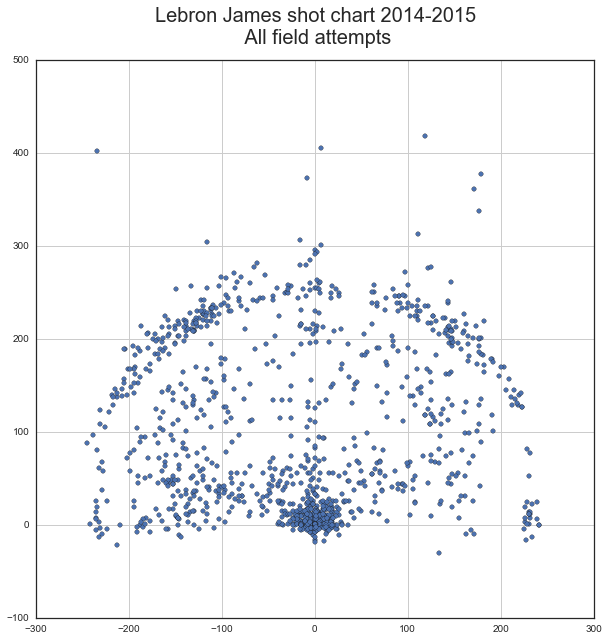

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_color_codes()

plt.figure(figsize=(10,10))
plt.scatter( shot_df.LOC_X, shot_df.LOC_Y,s=20,marker='o',alpha=1)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.title('Lebron James shot chart 2014-2015 \n All field attempts', y = 1.02, fontsize=20)

plt.grid()
plt.show()


Let's plot the converted and missed shots,

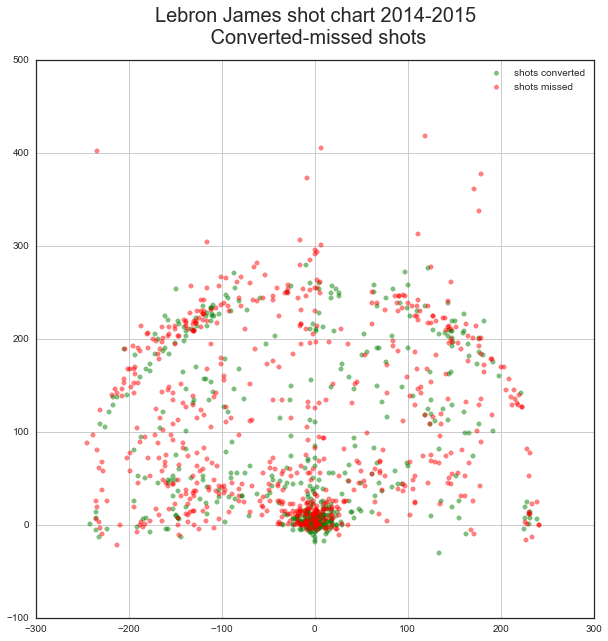

In [39]:
sns.set_style("white")
sns.set_color_codes()


plt.figure(figsize=(10,10))

plt.scatter(shot_df[shot_df.SHOT_MADE_FLAG == 1].LOC_X, shot_df[shot_df.SHOT_MADE_FLAG == 1].LOC_Y, color='green',label='shots converted',s=20,marker='o',alpha=1.0/2.0)
plt.scatter(shot_df[shot_df.SHOT_MADE_FLAG == 0].LOC_X, shot_df[shot_df.SHOT_MADE_FLAG == 0].LOC_Y, color='red',label='shots missed',s=20,marker='o',alpha=0.5)

plt.legend()

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.title('Lebron James shot chart 2014-2015 \n Converted-missed shots', y = 1.02, fontsize=20)

plt.grid()
plt.show()


Let's see in what position Lebron took more shots by using histograms.

First we need to create a `DataFrame` with the **LOC_X** and **LOC_Y** information,

In [40]:
h1=pd.DataFrame(shot_df, columns=['LOC_X', 'LOC_Y'])


Now we use this `DataFrame` to plot the histograms for **LOC_X** and **LOC_Y**,

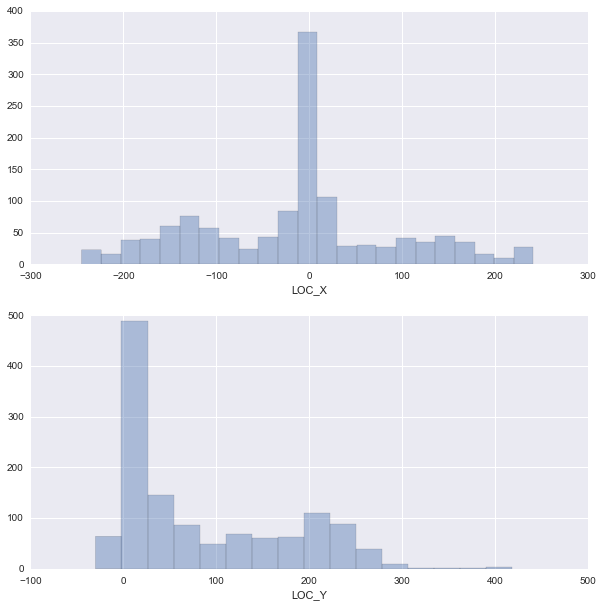

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.distplot(h1.LOC_X,kde=False);

plt.subplot(2, 1, 2)
sns.distplot(h1.LOC_Y,kde=False);


As we can see from these histogram, Lebron took more shots around the rim.  

**We are doing exploratory data analysis or EDA.**  At this point, take your time and try to do different plots, there are many types and combinations.

Let's plot all shots and the histograms in one single plot, for this we are going to use **seaborn**,

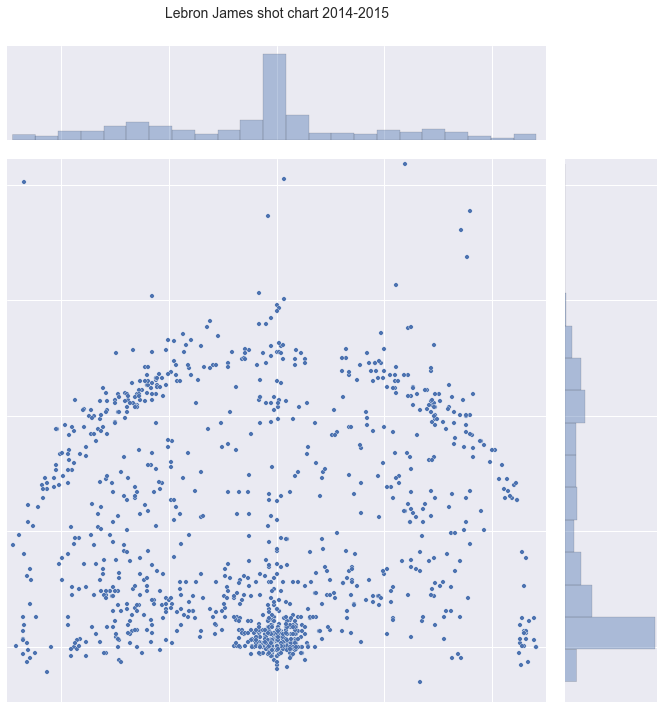

In [42]:
# create our jointplot
sns.set(color_codes=True)

joint_shot_chart = sns.jointplot(shot_df1.LOC_X, shot_df1.LOC_Y, stat_func=None,
                                 kind='scatter',space=0.2, alpha=1, 
                                 size=8, edgecolor='w', color='b').set_axis_labels("x location", "y location")

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to adjust
joint_shot_chart.fig.set_size_inches(10,10)
ax = joint_shot_chart.ax_joint

# Adjust the axis limits and orientation of the plot in order
ax.set_xlim(-250,250)
#ax.set_ylim(422.5, -47.5)
ax.set_ylim(-47.5, 422.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James shot chart 2014-2015', 
             y=1.25, fontsize=14)

plt.show()


As we can see here, Lebron is very active close to the rim area. 

What about his effectivity?, this is let to you as an exercise.

Instead of using a scatter plot, we can use hexbins. In **seaborn**, you can proceed as follows,

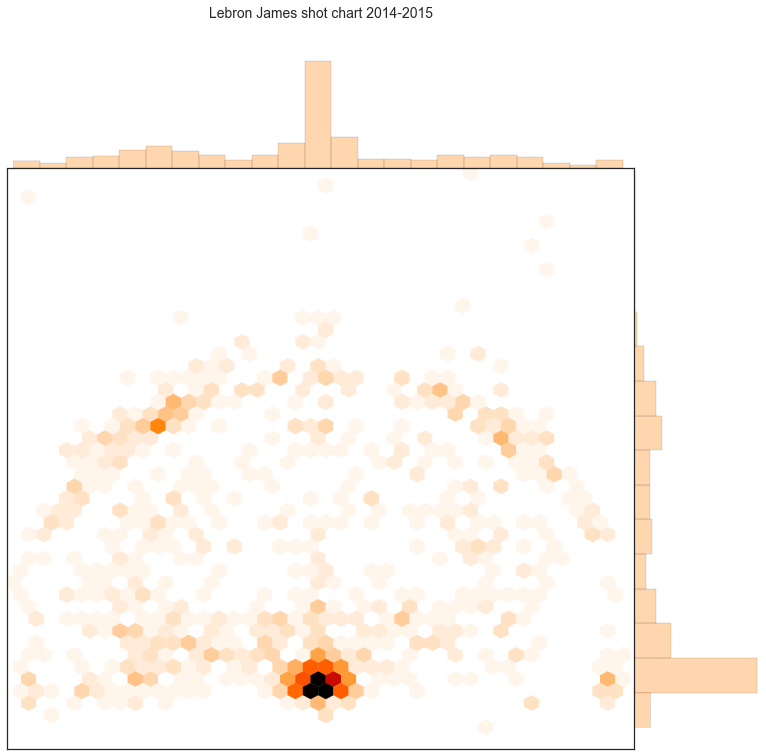

In [43]:
# create our jointplot
sns.set_style("white")

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
                                 kind='hex',gridsize=40,space=0, color=cmap(0.2), cmap=cmap,vmin=0, vmax=50)

#joint_shot_chart = sns.jointplot(shot_df.LOC_X, shot_df.LOC_Y, stat_func=None,
#                                 kind='hex',space=0, color=cmap(0.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to adjust
ax = joint_shot_chart.ax_joint

# Adjust the axis limits and orientation of the plot in order
ax.set_xlim(-250,250)
#ax.set_ylim(422.5, -47.5)
ax.set_ylim(-47.5, 422.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Lebron James shot chart 2014-2015', 
             y=1.25, fontsize=14)


# Add James Harden's image to the top right
#img = OffsetImage(image, zoom=0.6)
#img.set_offset((625,621))
#ax.add_artist(img)

plt.show()


Let's use `boxplot` to represent the field attempts,  this kind of plots are very useful to identify outliers or anomalies in your observations.

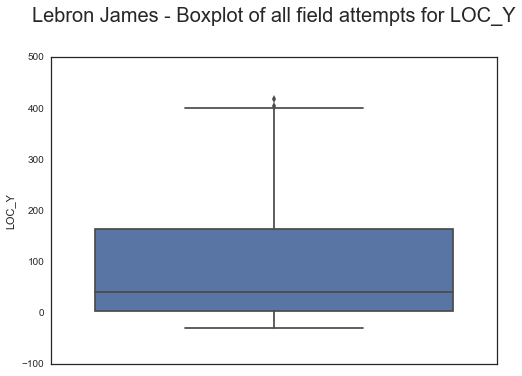

In [44]:
sns.boxplot(shot_df.LOC_Y, orient="v")
plt.title('Lebron James - Boxplot of all field attempts for LOC_Y', y = 1.1, fontsize=20)


In this plot we can see that there are a few outliers or irregular observations.

We can also plot the boxplot with the scatter point superimpose, as follows,

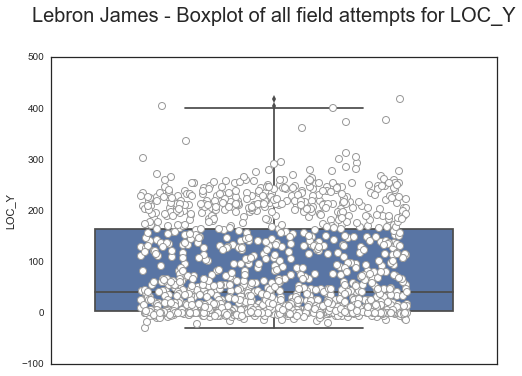

In [45]:
#sns.stripplot(data=shot_df.LOC_Y, jitter=True, color="white", edgecolor="gray")
sns.stripplot(data=shot_df.LOC_Y, jitter=0.3, color="white", edgecolor="gray")
sns.boxplot(shot_df.LOC_Y, orient="v")

plt.title('Lebron James - Boxplot of all field attempts for LOC_Y', y = 1.1, fontsize=20)


Here we see better the outliers, which corresponds to the shots taken from far away, and presumably close to the end of a period.  This is left as an exercise to the reader.

We can do the same for **LOC_X**,

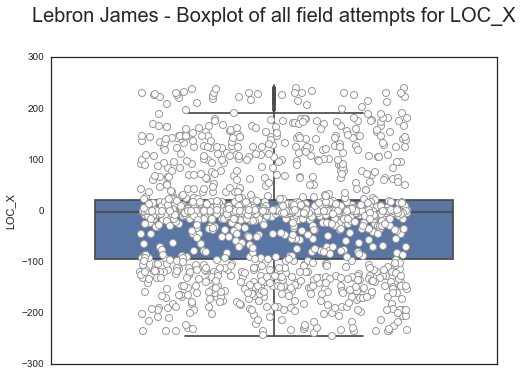

In [46]:
sns.stripplot(data=shot_df.LOC_X, jitter=0.3, color="white", edgecolor="gray")
sns.boxplot(shot_df.LOC_X, orient="v")

plt.title('Lebron James - Boxplot of all field attempts for LOC_X', y = 1.1, fontsize=20)

At the point let's do some pretty plotting.  We are going to add a background to the scatter plot and we are going to plot only the 3 point shots attempted. 

To plot the backgorund image we are going to use **scipy** [4].

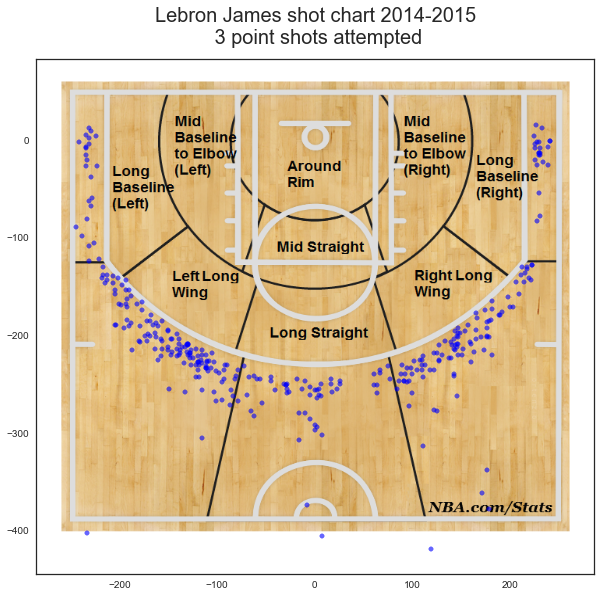

In [47]:
from scipy.misc import imread

plt.figure(figsize=(10,10))

#draw_court(outer_lines=True)
#plt.xlim(-300,300)
#plt.ylim(-100,500)

datafile = 'chart1.png'
#datafile = 'chart2.jpg'
#datafile = 'bg_court.jpg'
img = imread(datafile)

#plt.imshow(img, zorder=0, extent=[-260, 260, -60, 400])
plt.imshow(img, zorder=0, extent=[-260, 260, -400, 60])
plt.scatter(c2.LOC_X,-1*c2.LOC_Y,zorder=1,color='blue',label='3 point shots attempted',s=20,marker='o',alpha=0.6)

plt.title('Lebron James shot chart 2014-2015 \n 3 point shots attempted', y = 1.02, fontsize=20)

#plt.ylim(400, -60)
plt.show()


Much better no, here we see the importance of visualizing the data and using the right visual encoders.

Now we get a better idea of those outliers we identified with the boxplots.

Let's do the same plot of the 2 point shots attempted,

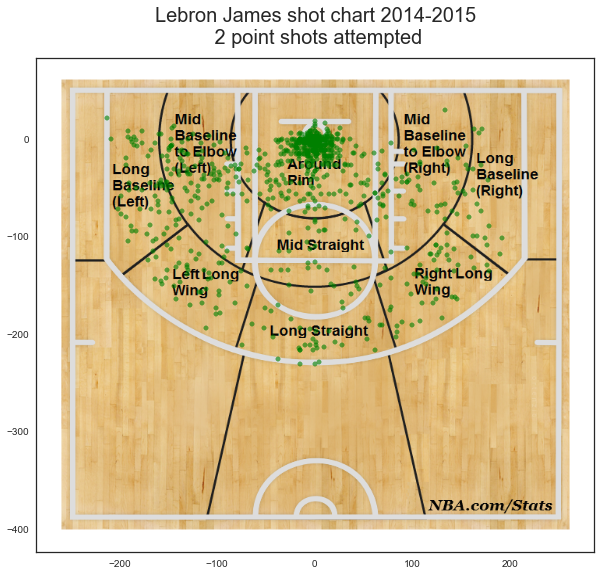

In [48]:
from scipy.misc import imread

plt.figure(figsize=(10,10))

#draw_court(outer_lines=True)
#plt.xlim(-300,300)
#plt.ylim(-100,500)

datafile = 'chart1.png'
#datafile = 'chart2.jpg'
#datafile = 'bg_court.jpg'
img = imread(datafile)

#plt.imshow(img, zorder=0, extent=[-260, 260, -60, 400])
plt.imshow(img, zorder=0, extent=[-260, 260, -400, 60])
plt.scatter(c1.LOC_X,-1*c1.LOC_Y,zorder=1,color='green',label='2 point shots attempted',s=20,marker='o',alpha=0.6)

plt.title('Lebron James shot chart 2014-2015 \n 2 point shots attempted', y = 1.02, fontsize=20)

#plt.ylim(400, -60)
plt.show()


Let's do a pretty plot of the 2 point shots attempted, grouped by missed and converted shots.

Pay attention of how we are manipulating the `DataFrame` at plot time.

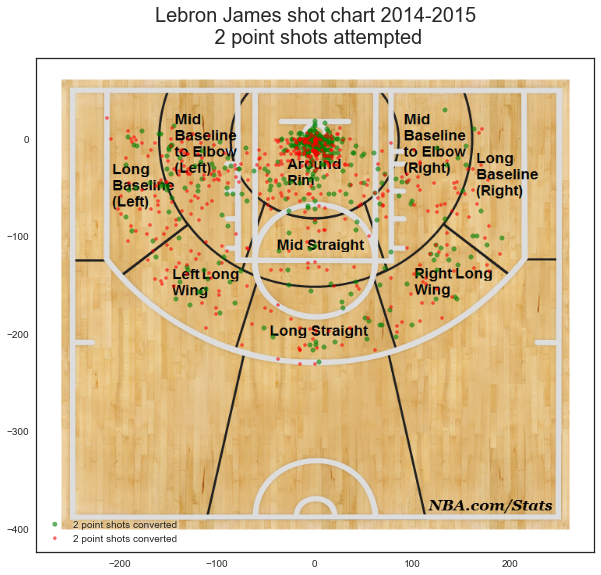

In [49]:
from scipy.misc import imread

plt.figure(figsize=(10,10))

#draw_court(outer_lines=True)
#plt.xlim(-300,300)
#plt.ylim(-100,500)

datafile = 'chart1.png'
#datafile = 'chart2.jpg'
#datafile = 'bg_court.jpg'
img = imread(datafile)

#plt.imshow(img, zorder=0, extent=[-260, 260, -60, 400])
plt.imshow(img, zorder=0, extent=[-260, 260, -400, 60])
plt.scatter(shot_df1.LOC_X[(shot_df1.SHOT_MADE_FLAG == 1) & (shot_df.SHOT_TYPE == '2PT Field Goal')] ,-1*shot_df1.LOC_Y[(shot_df1.SHOT_MADE_FLAG == 1) & (shot_df.SHOT_TYPE == '2PT Field Goal')],
            zorder=1,color='green',label='2 point shots converted',s=20,marker='o',alpha=0.6)
plt.scatter(shot_df1.LOC_X[(shot_df1.SHOT_MADE_FLAG == 0) & (shot_df.SHOT_TYPE == '2PT Field Goal')] ,-1*shot_df1.LOC_Y[(shot_df1.SHOT_MADE_FLAG == 0) & (shot_df.SHOT_TYPE == '2PT Field Goal')],
            zorder=1,color='red',label='2 point shots converted',s=10,marker='o',alpha=0.6)



plt.title('Lebron James shot chart 2014-2015 \n 2 point shots attempted', y = 1.02, fontsize=20)

plt.legend(loc='lower left')

#plt.ylim(400, -60)
plt.show()



In the previous plots, we used **matplotlib** and **seaborn**.  

We can also plot using **pandas** as follows,

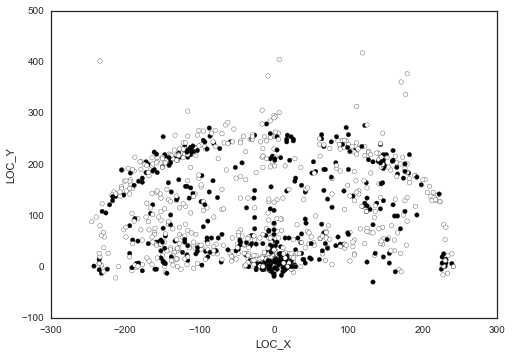

In [50]:
shot_df.plot(kind='scatter',x='LOC_X', y='LOC_Y',c='SHOT_MADE_FLAG',colorbar=False);

#plt.xlim(-300,300)
#plt.ylim(-100,500)

_ = plt.xlim(-300,300)
_ = plt.ylim(-100,500)

#The _ is used to hold the result of the last executed statement in an interactive interpreter session.
#If you do not use, it will print out the value of the last statement

To plot hexbins using **pandas** we proceed as follows,

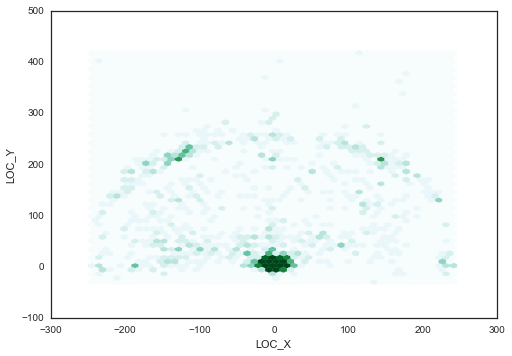

In [51]:
shot_df.plot(kind='hexbin', x='LOC_X', y='LOC_Y', gridsize=50, colorbar=False, vmin=0, vmax=10)
plt.xlim(-300,300)
_ = plt.ylim(-100,500)

#The _ is used to hold the result of the last executed statement in an interactive interpreter session.
#If you do not use, it will print out the value of the last statement

We can also plot using the `DataFrameGroupBy`.  

Let's create a group as follows,

In [52]:
#gb3 = shot_df.groupby('SHOT_ZONE_AREA')
gb3 = shot_df.groupby('SHOT_TYPE')

#gb3x = shot_df.groupby('SHOT_TYPE').LOC_X
#gb3y = shot_df.groupby('SHOT_TYPE').LOC_Y


which has a size of,

In [53]:
gb3.size()


SHOT_TYPE
2PT Field Goal    940
3PT Field Goal    339
dtype: int64

and a type,

In [54]:
type(gb3)


pandas.core.groupby.DataFrameGroupBy

Now we can collect the coordinates **LOC_X** and **LOC_Y** of the group we just created,

In [55]:
x=gb3.LOC_X.get_group('2PT Field Goal')
y=gb3.LOC_Y.get_group('2PT Field Goal')
xx=gb3.LOC_X.get_group('3PT Field Goal')
yy=gb3.LOC_Y.get_group('3PT Field Goal')


In [56]:
#x=gb3.LOC_X.head(2)
#y=gb3.LOC_Y.head(2)

Now we can do the scatter plot as follows,

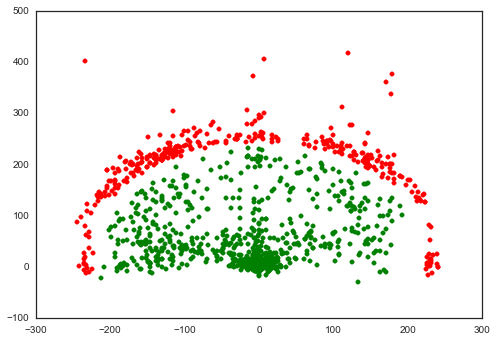

In [57]:
plt.scatter( x, y,s=20,marker='o',alpha=1,color='green')
plt.scatter( xx, yy,s=20,marker='o',alpha=1,color='red')


We can also directly plot the `DataFrameGroupBy` as follows,

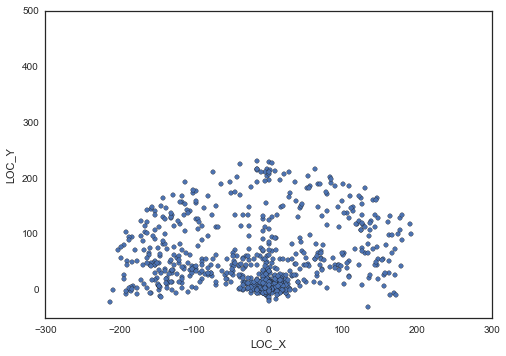

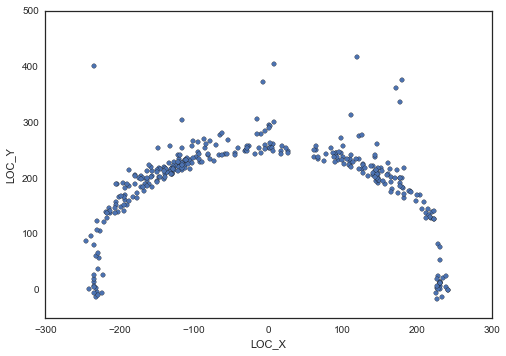

In [58]:
gb3.plot(kind='scatter', x='LOC_X', y='LOC_Y',xlim=[-300,300], ylim=[-50,500]);


Notice that it automatically creates two plots, one corresponding to the two point shots and the other one to the three point shots.

With a little bit manipulation, you can put both plots in a single figure and use colors to represent the shot type, this is left to the reader as an exercise.

We can also plot histograms of the `DataFrameGroupBy`,

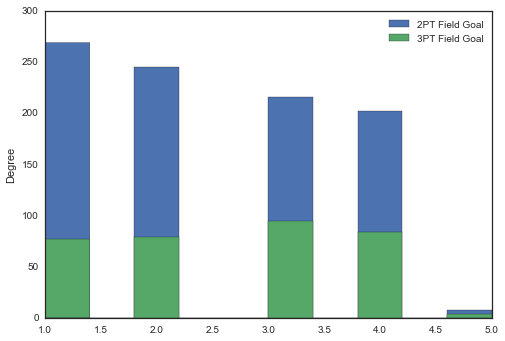

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_color_codes()

gb3.PERIOD.plot(kind='hist')
plt.legend()

Let's create a new `DataFrameGroupBy` as follows,

In [60]:
gb4 = shot_df.groupby('SHOT_ZONE_AREA')


In [61]:
gb4.size()


SHOT_ZONE_AREA
Back Court(BC)             3
Center(C)                670
Left Side Center(LC)     177
Left Side(L)             181
Right Side Center(RC)    149
Right Side(R)             99
dtype: int64

And to plot the histograms,

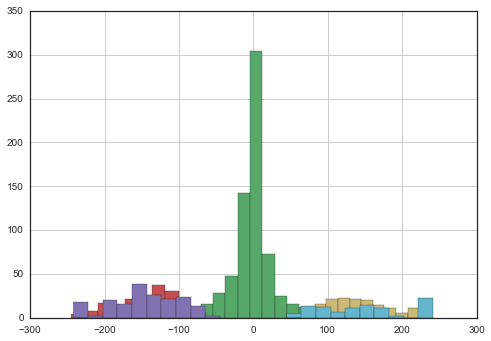

In [62]:
#gb4.LOC_X.hist()

#It does not print out data
_ = gb4.LOC_X.hist()

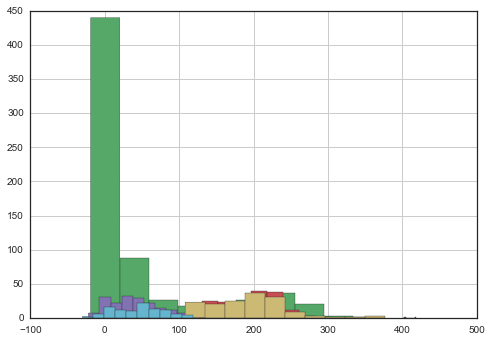

In [63]:
#gb4.LOC_Y.hist()

#It does not print out data
_ = gb4.LOC_Y.hist()

Let's do the scatter plots for the `DataFrameGroupBy`,

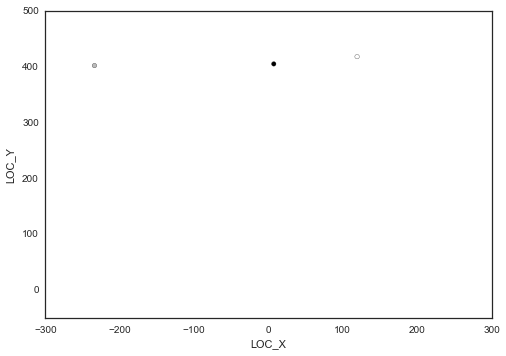

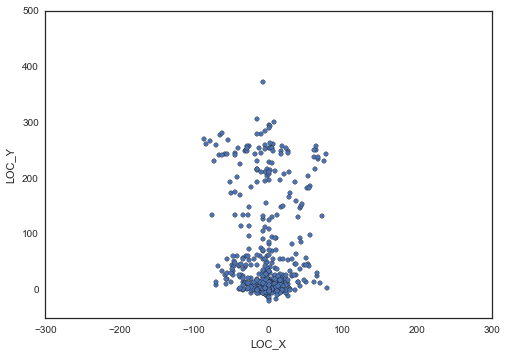

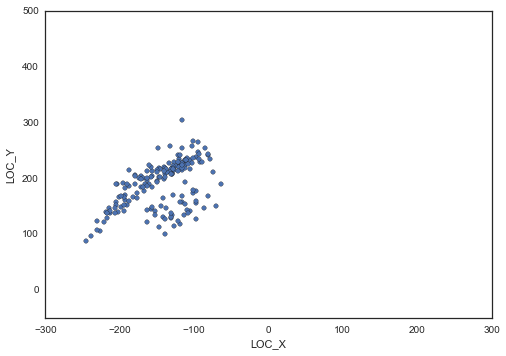

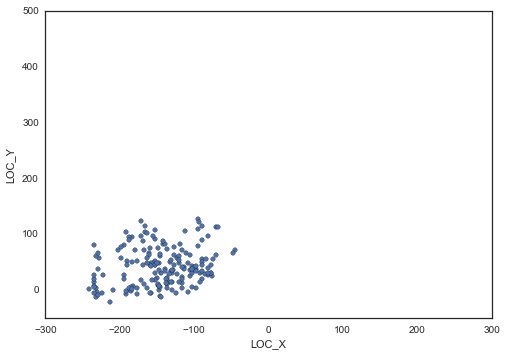

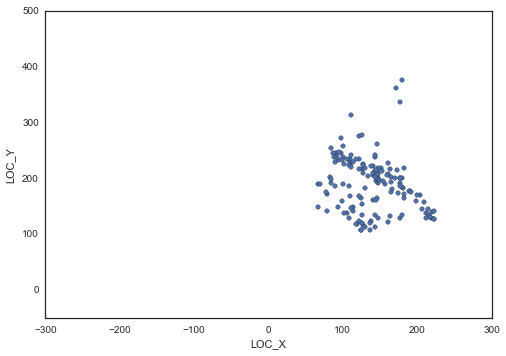

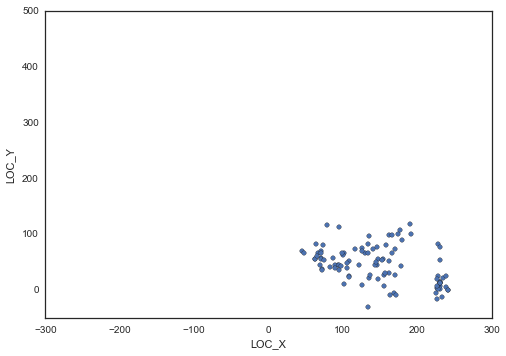

In [64]:
gb4.plot(kind='scatter', x='LOC_X', y='LOC_Y',xlim=[-300,300], ylim=[-50,500]);


We can choose to plot only the Center shots of the `DataFrameGroupBy` as follows,

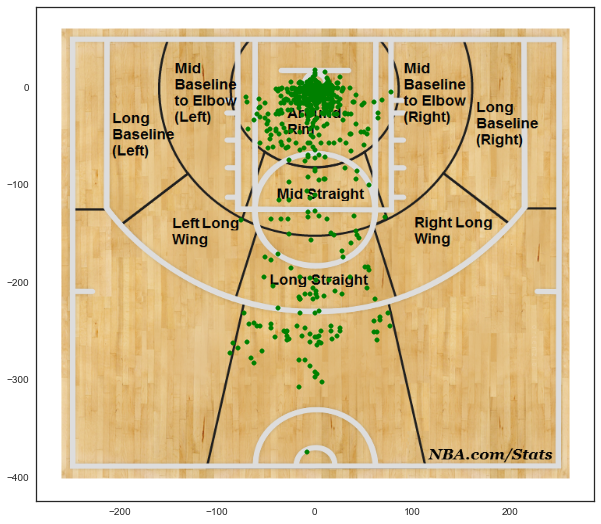

In [65]:
from scipy.misc import imread

plt.figure(figsize=(10,10))

datafile = 'chart1.png'
img = imread(datafile)

#gb4.get_group('Center(C)').head(2)
#gb4.get_group('Center(C)').LOC_X

plt.imshow(img, zorder=0, extent=[-260, 260, -400, 60])

plt.scatter(gb4.get_group('Center(C)').LOC_X, -1*gb4.get_group('Center(C)').LOC_Y,s=20,marker='o',alpha=1,color='green')

#plt.xlim(-300,300)
#plt.ylim(-100,500)


### As you can see, there are many ways to plot using **Python**, it is up to you to choose.
 

### The main take away of this tutorial, is that by using exploratory data analysis (EDA) we can analyze data sets using visual methods.


### In the next tutorial, we are going to work a little bit more on advanced data analytics methods such as unsupervised methods or clustering techniques and a little bit more on advanced data visualization.

# References

[1] http://pandas.pydata.org/
    
[2]    http://matplotlib.org/

[3] http://stanford.edu/~mwaskom/software/seaborn/

[4] http://www.scipy.org/

In [66]:
#import sys
#print('Python version:', sys.version_info)

#import IPython
#print('IPython version:', IPython.__version__)

#print('Requests version', requests.__version__)
#print('Pandas version:', pd.__version__)
#print('json version:', json.__version__)

#import matplotlib
#print('matplotlib version:', matplotlib.__version__)

#print('seaborn version:', sns.__version__)

#import scipy
#print('scipy version:', scipy.__version__)